# REGRESSION

Dataset Source: https://www.kaggle.com/swathiachath/kc-housesales-data

# Importing Data Set

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv('export_dataframe.csv')

## Viewing Data

In [2]:
data.shape

(21597, 21)

Missing values are marked as '?'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null object
date             21597 non-null object
price            21597 non-null object
bedrooms         21597 non-null object
bathrooms        21597 non-null object
sqft_living      21597 non-null object
sqft_lot         21597 non-null object
floors           21597 non-null object
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null object
sqft_basement    21597 non-null object
yr_built         21597 non-null object
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null object
long             21597 non-null object
sqft_living15    21597 non-null object
sqft_lot15       21597 non-null object
dtypes: object(21)
memory usage: 3.5+ MB


## Dataset Summary:
- Features: 21
     - Categorical columns: 2
     - Ordinal columns: 4
- Rows: 21597
- Percentage of missing values: 5.0%
- Target Value: 'Price'

# Replacing '?' (missing values) with nan

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,?,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,?,0,?,47.7379,-122.23299999999999,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,?,1965,0,?,47.5208,-122.39299999999999,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data = data.replace('?', np.nan)

In [6]:
data.isna().sum()

id               1072
date             1065
price            1069
bedrooms         1066
bathrooms        1067
sqft_living      1070
sqft_lot         1068
floors           1078
waterfront       1074
view             1073
condition        1073
grade            1071
sqft_above       1077
sqft_basement    1063
yr_built         1076
yr_renovated     1066
zipcode          1072
lat              1072
long             1070
sqft_living15    1082
sqft_lot15       1066
dtype: int64

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,NaN,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,NaN,0,NaN,47.7379,-122.23299999999999,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,NaN,1965,0,NaN,47.5208,-122.39299999999999,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data = data.drop([ 'id','date'], axis = 1)

In [9]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721000000000004,NaN,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,NaN,0,NaN,47.7379,-122.23299999999999,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,NaN,1965,0,NaN,47.5208,-122.39299999999999,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Dealing with missing values

In [10]:
data['price'] = data['price'].astype(float)
data['bathrooms'] = data['bathrooms'].astype(float)
data['bedrooms'] = data['bedrooms'].astype(float)
data['sqft_living'] = data['sqft_living'].astype(float)
data['sqft_lot'] = data['sqft_lot'].astype(float)
data['floors'] = data['floors'].astype(float)
data['waterfront'] = data['waterfront'].astype(float)
data['view'] = data['view'].astype(float)
data['condition'] = data['condition'].astype(float)
data['grade'] = data['grade'].astype(float)
data['sqft_above'] = data['sqft_above'].astype(float)
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['yr_built'] = data['yr_built'].astype(float)
data['yr_renovated'] = data['yr_renovated'].astype(float)
data['zipcode'] = data['price'].astype(float)
data['lat'] = data['zipcode'].astype(float)
data['long'] = data['long'].astype(float)
data['sqft_living15'] = data['sqft_living15'].astype(float)
data['sqft_lot15'] = data['sqft_lot15'].astype(float)

Replacing Nulls with Mean

In [11]:
data.fillna(data.mean(), inplace=True)

In [12]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Histogram of Dataset

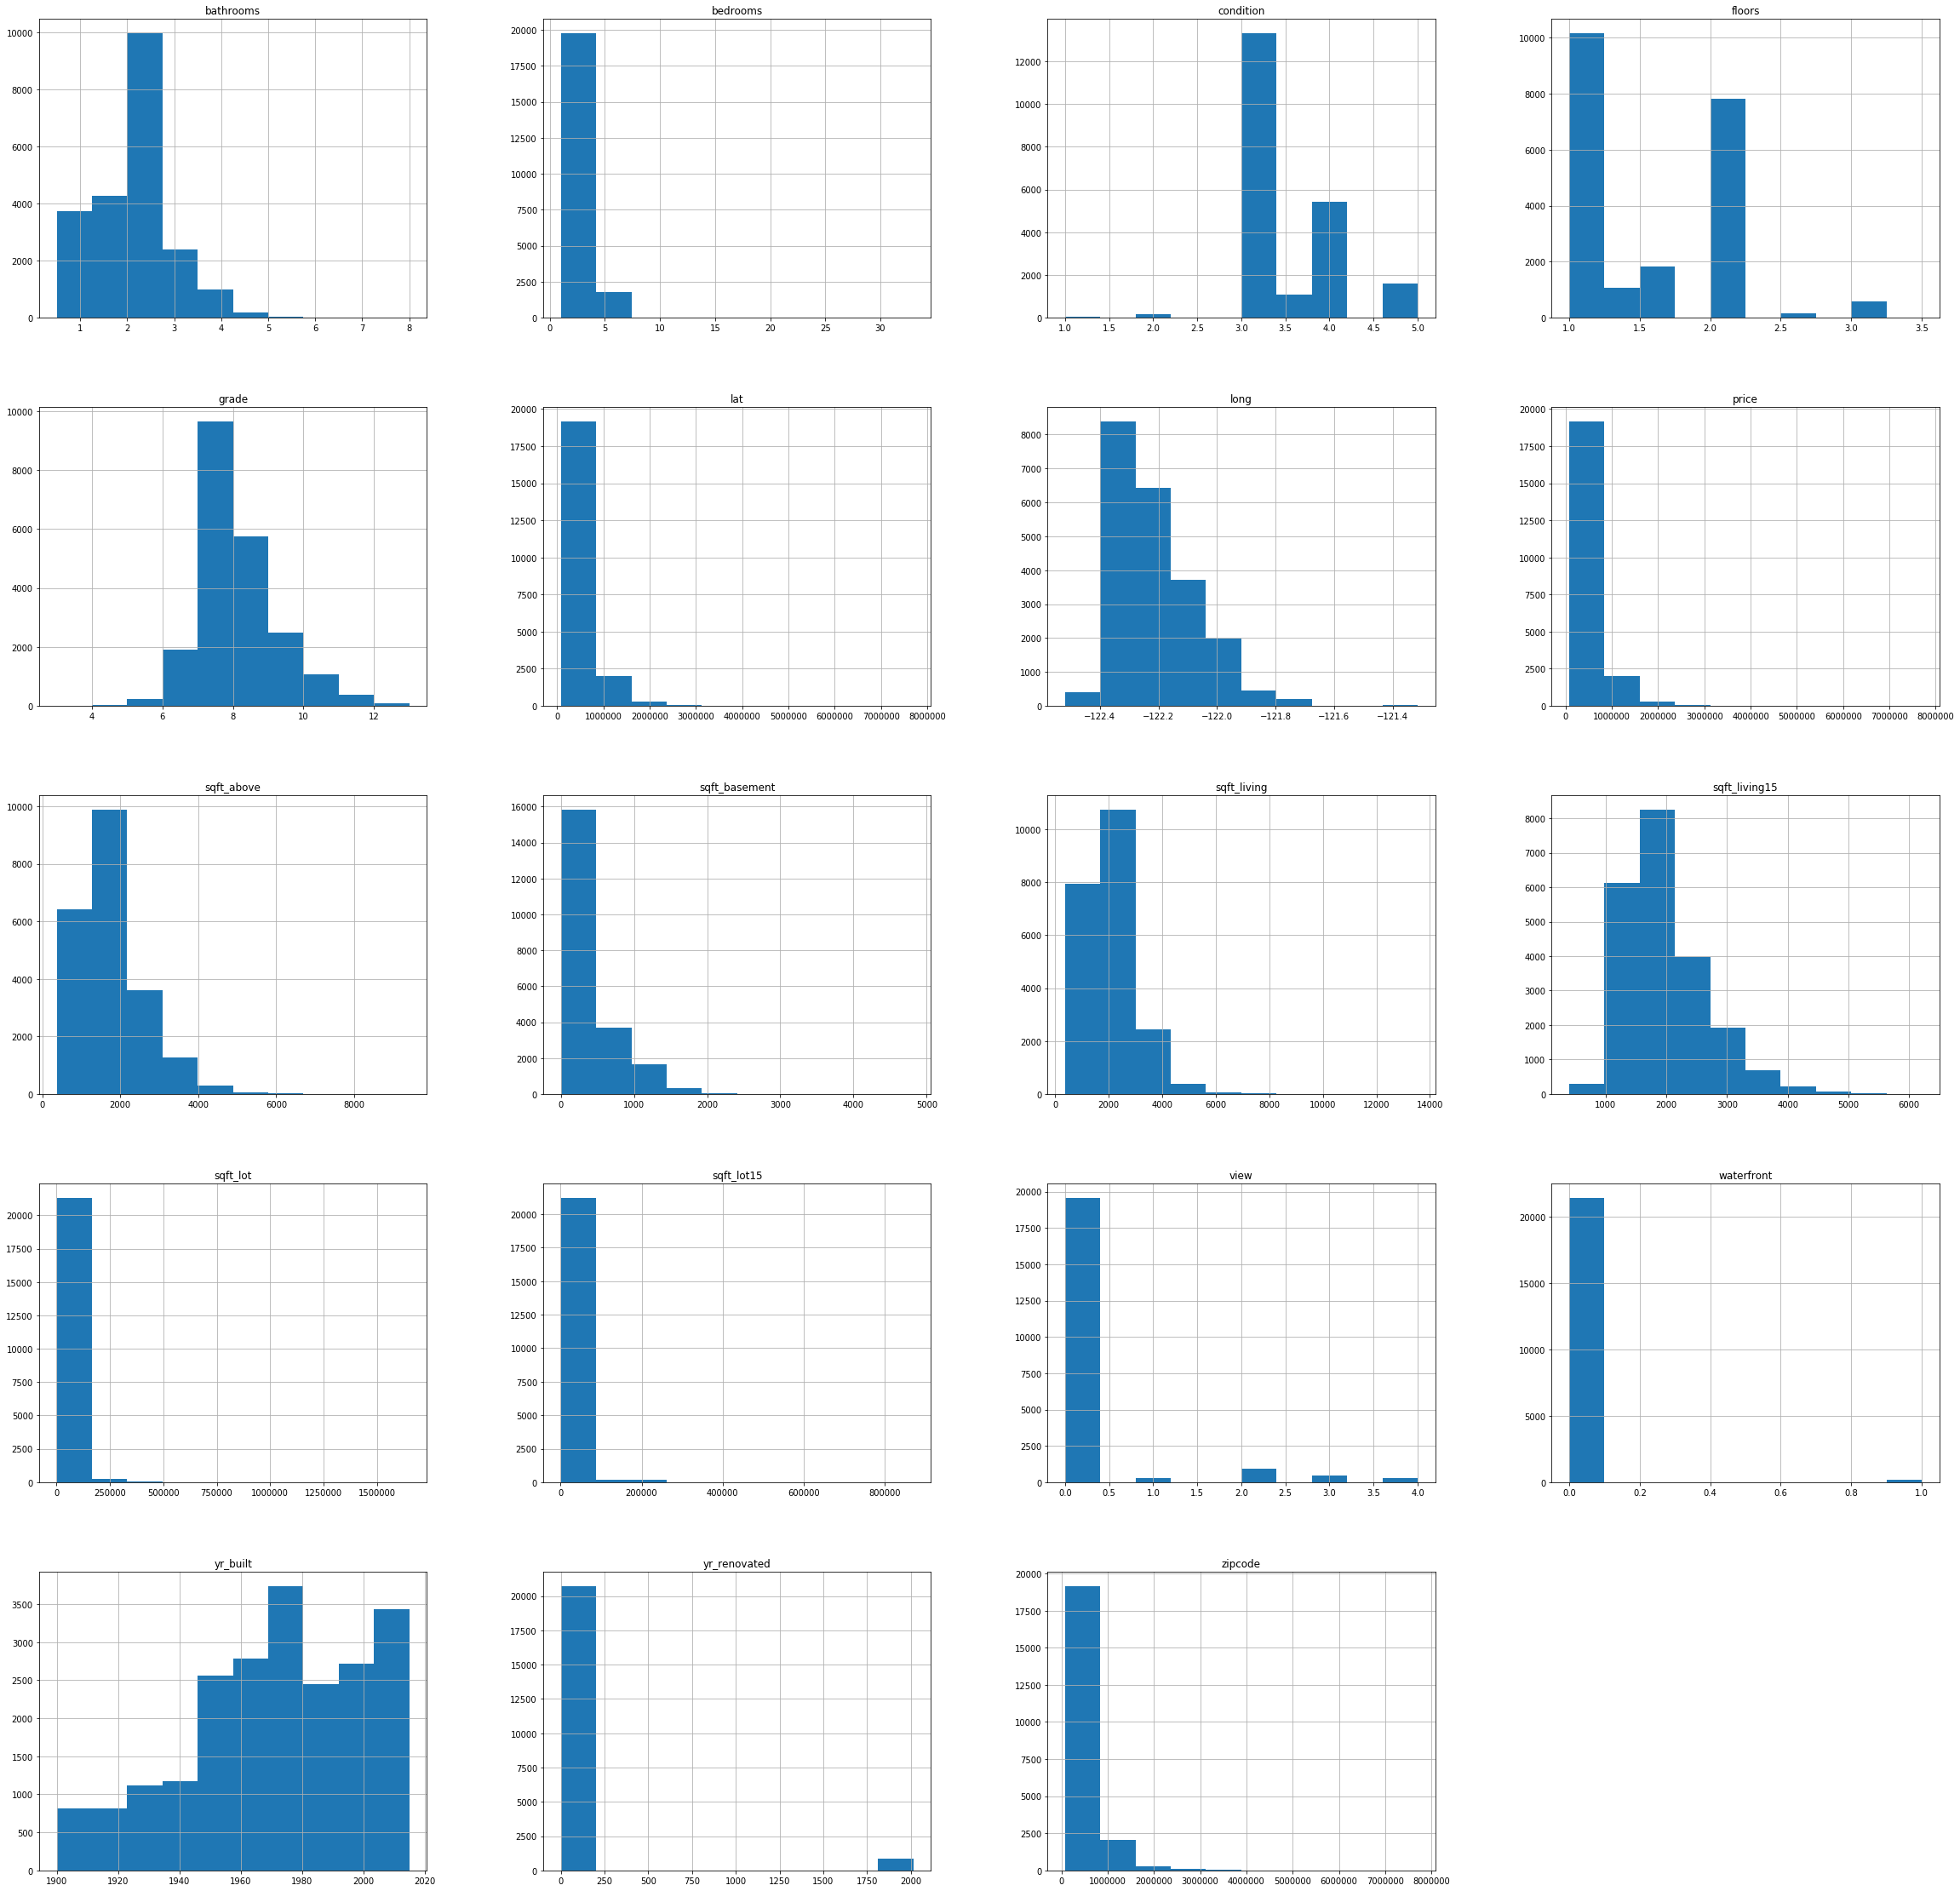

In [16]:
pd.DataFrame.hist(data, figsize = [40,40]);

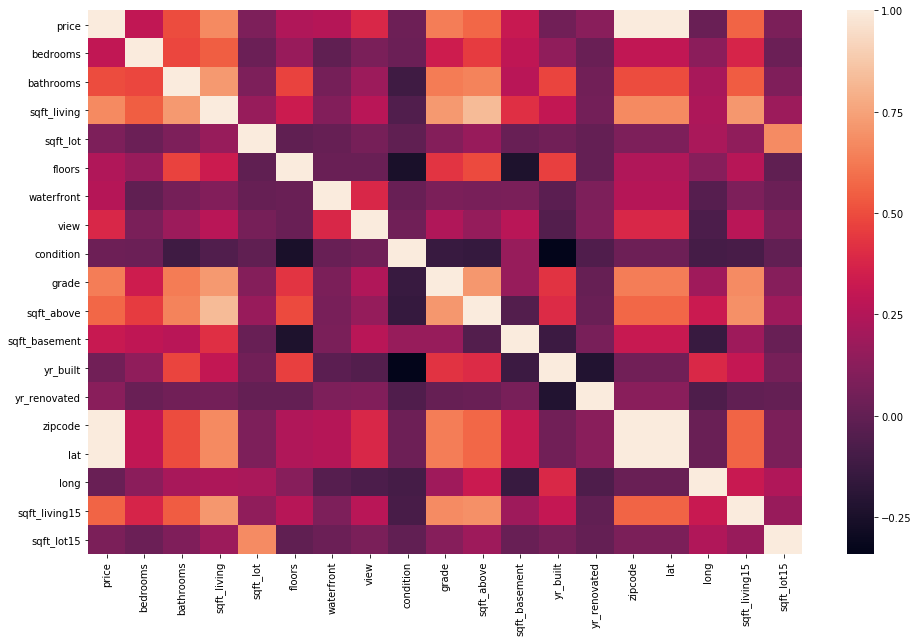

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (16,10))
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


# Scaling and Splitting the Data

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
y = data['price']
X = data.drop(['price', 'lat','long', 'sqft_living15', 'sqft_lot15', 'zipcode'], axis = 1)

In [17]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Bagging

## KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

kn_clf = KNeighborsRegressor(7)
bag_clf = BaggingRegressor(kn_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

In [19]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.6524330402966465

In [20]:
bag_clf.score(X_train, y_train)

0.7356909630771654

In [21]:
X_train.shape

(16197, 13)

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lr_clf = LinearRegression()
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

In [23]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.6147612457365621

In [24]:
bag_clf.score(X_train, y_train)

0.5985295842422409

In [25]:
X_train.shape

(16197, 13)

# Pasting

## Ridge

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [27]:
from  sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor

ltr_clf = Ridge(alpha = 10)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, bootstrap= False, max_features=10, random_state = 0)

In [28]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.6147246601652339

In [29]:
bag_clf.score(X_train, y_train)

0.5986267926187404

In [30]:
X_train.shape

(16197, 13)

## Lasso

In [31]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor

ltr_clf = Lasso(alpha = 100)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, bootstrap= False, max_features=10, random_state = 0)

In [32]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.6147246601652339

In [33]:
bag_clf.score(X_train, y_train)

0.5986267926187404

In [34]:
X_train.shape

(16197, 13)

# AdaBoost

In [35]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Linear Regression

In [36]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(LinearRegression(), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [37]:
ada_clf.score(X_train, y_train)

0.3054605004442804

In [38]:
ada_clf.score(X_test, y_test)

0.19079377368947759

## KNN Regression

In [39]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(KNeighborsRegressor(7), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [40]:
ada_clf.score(X_train, y_train)

0.8795975251759522

In [41]:
ada_clf.score(X_test, y_test)

0.44615099836173344

# Gradient Boost

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gd_clf = GradientBoostingRegressor(max_depth= 1, n_estimators= 50, learning_rate= 0.1, random_state= 0)

In [43]:
gd_clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
gd_clf.score(X_train, y_train)

0.5781798637530431

In [45]:
gd_clf.score(X_test, y_test)

0.5579576420595869

# PCA

In [46]:
X.shape

(21597, 13)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [48]:
X_train_reduced.shape

(16197, 10)

In [49]:
X_test_reduced = pca.transform(X_test)

# K Neighbors Regressor

Text(0, 0.5, 'MSE')

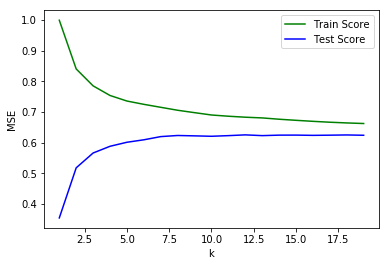

In [50]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced, y_train)
    train_score_array.append(knn_reg.score(X_train_reduced, y_train))
    test_score_array.append(knn_reg.score(X_test_reduced, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

k=7 is the best choice

In [51]:
knn = KNeighborsRegressor(7)
knn.fit(X_train_reduced, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [52]:
print("Train score :", knn.score(X_train_reduced, y_train))
print("Test score :", knn.score(X_test_reduced, y_test))

Train score : 0.7156416438002433
Test score : 0.6201257084524656


In [53]:
y_pred= knn.predict(X_test_reduced)

print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 136725.2582413877
Mean Squared Error is : 42902378539.75499
R-sqaure score is:  0.6201257084524656


# Linear regression using the Normal Equation

In [54]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)
print("Train score :",lreg.score(X_train_reduced, y_train))
print("Test score :",lreg.score(X_test_reduced, y_test))

Train score : 0.6007430663381426
Test score : 0.6147607011943719


In [55]:
y_pred = lreg.predict(X_test_reduced)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 142146.72684490512
Mean Squared Error is : 43508293647.40178
R-sqaure score is:  0.6147607011943719


# SGD Regressor

In [56]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train_reduced, y_train)
print("Train Score is: ", sgd_reg.score(X_train_reduced, y_train))
print("Test Score is: ",sgd_reg.score(X_test_reduced, y_test))

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Train Score is:  0.6007429176531465
Test Score is:  0.6148032563694815


In [57]:
sgd_reg.coef_

array([111454.55968216,  90863.27368552, -36286.83303365,   5118.93958492,
        -3665.14546932, -37088.50239879, -57755.38295138, -58029.71706792,
       -87855.34639144, -65143.58471969])

In [58]:
sgd_reg.intercept_

array([542970.02703468])

In [59]:
sgd_reg.n_iter_

100000

In [60]:
y_pred = sgd_reg.predict(X_test_reduced)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 142125.8024080242
Mean Squared Error is : 43503487535.822235
R-sqaure score is:  0.6148032563694815


# Polynomial regression

In [61]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [62]:
print(train_score_list)
print(test_score_list)

[0.6007430663381426, 0.6805659133225694]
[0.6147607011943719, 0.6539874126942656]


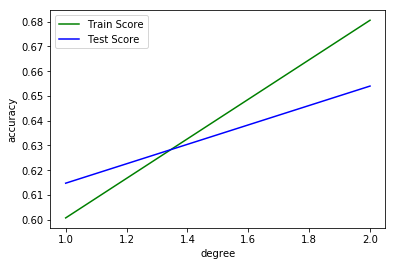

In [63]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

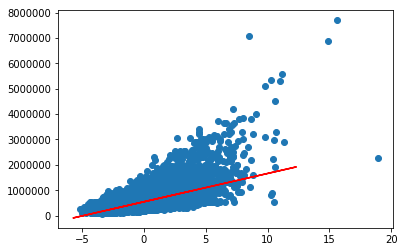

In [64]:
poly = PolynomialFeatures(1)
X_train_1 = X_train_reduced[:,0].reshape(-1,1)
X_test_1 = X_test_reduced[:,0].reshape(-1,1)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(X_test_1)
y_predict = lreg.predict(x_poly)

plt.scatter(X_train_1,y_train)
plt.plot(X_test_1, y_predict, c='r')

# Ridge

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [67]:
X_train_reduced.shape

(16197, 8)

In [68]:
X_test_reduced = pca.transform(X_test)

In [69]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(ridge.score(X_train_reduced,y_train))
    test_score_list.append(ridge.score(X_test_reduced, y_test))

Text(0.5, 0, '$\\alpha$')

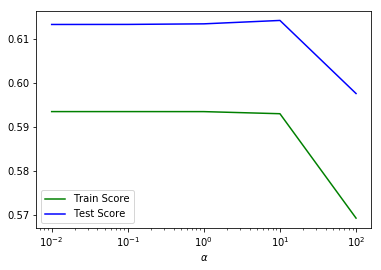

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [71]:
print(train_score_list)
print(test_score_list)

[0.5934321385617065, 0.5934320853661716, 0.5934268214050162, 0.592950429761624, 0.5692622889261478]
[0.6132009998838508, 0.6132143576718083, 0.6133423143454901, 0.6141139668118485, 0.5975325950443005]


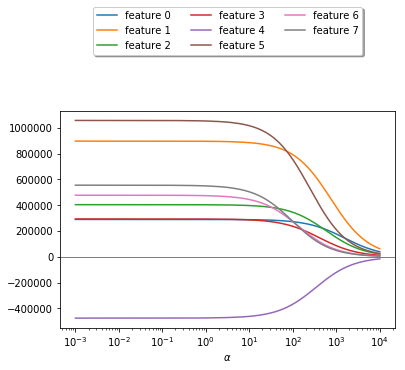

In [72]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

This suggests that the best $\alpha$ parameter is 10

In [73]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_reduced, y_test)))

Train score: 0.5930
Test score: 0.6141


In [74]:
ridge.coef_

array([ 288300.47118934,  886039.65859716,  397950.48217106,
        286587.62664194, -462173.17972222, 1017407.92573355,
        444692.33383724,  504268.61937225])

In [75]:
ridge.intercept_

542963.2777731449

In [76]:
y_pred = ridge.predict(X_test_reduced)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 141269.0535585147
Mean Squared Error is : 43581334766.29577
R-sqaure score is:  0.6141139668118485


# LASSO

In [77]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))

Text(0.5, 0, '$\\alpha$')

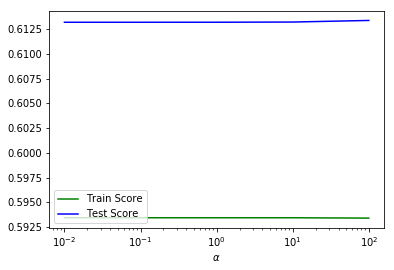

In [78]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

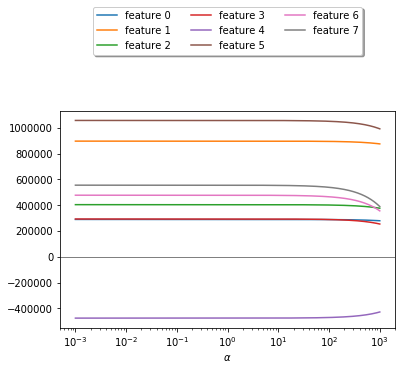

In [79]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

This suggests that the best $\alpha$ parameter is 100

In [80]:
lasso = Lasso(alpha = 100)
lasso.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test_reduced, y_test)))

Train score: 0.5934
Test score: 0.6134


In [81]:
y_pred= lasso.predict(X_test_reduced)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 142072.96348904914
Mean Squared Error is : 43663877736.65567
R-sqaure score is:  0.6133830993528651


# Linear SVM

In [82]:
from sklearn.svm import LinearSVR

l_svr = LinearSVR(random_state=0)

l_svr.fit(X_train_reduced,y_train)

print("Train score :",l_svr.score(X_train_reduced, y_train))
print("Test score :",l_svr.score(X_test_reduced, y_test))

Train score : -2.072657485214923
Test score : -2.3860123291823063


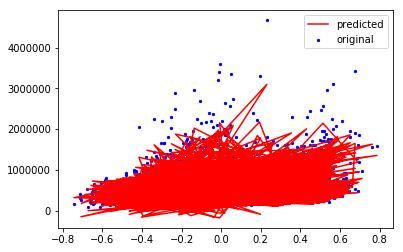

In [83]:
import matplotlib.pyplot as plt 
X_test1 = X_test_reduced[:, 0:1]
plt.scatter(X_test1, y_test, s=5, color="blue", label="original")
plt.plot(X_test1, y_pred, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 

In [84]:
y_pred = l_svr.predict(X_test_reduced)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 519107.2272727945
Mean Squared Error is : 382410670896.0566
R-sqaure score is:  -2.3860123291823063


# SVM with Kernal

In [85]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')

svr.fit(X_train_reduced,y_train)

print("Train score :",svr.score(X_train_reduced, y_train))
print("Test score :",svr.score(X_test_reduced, y_test))

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score : -0.04043826477383572
Test score : -0.03846424313859065


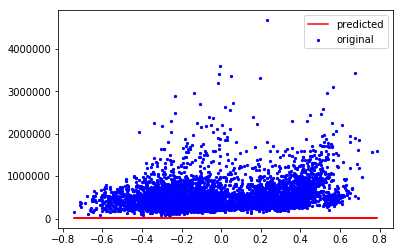

In [86]:
import matplotlib.pyplot as plt 
X_test1 = X_test_reduced[:, 0:1]
plt.scatter(X_test1, y_test, s=5, color="blue", label="original")
plt.plot(X_test1, y_pred, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 

In [87]:
y_pred = svr.predict(X_test_reduced)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 211605.37034913336
Mean Squared Error is : 117282445931.34578
R-sqaure score is:  -0.03846424313859065


We observe that SVM models are not a good fit for the data.

# Comparision of Models Before and After PCA

## Before PCA

In [88]:
import pandas as pd
Regression = {'Models before PCA':['K Neighbors Regressor','Linear Regrerssion','SGD Regressor','Polynomial Regression-degree 1','Polynomial Regression-degree 2','Ridge','Lasso','Linear SVM','SVM-rbf'],'Train Score':[0.7099,0.6038,0.5648,0.6037,0.6965,0.6010,0.6034,-1.9329,-0.0405],'Test_Score':[0.6242,0.6210,0.5850,6209,0.6613,0.6217,0.6218,-2.2239,0.0386]}
Regression_score = pd.DataFrame(Regression)
Regression_score

,Models before PCA,Train Score,Test_Score
0,K Neighbors Regressor,0.7099,0.6242
1,Linear Regrerssion,0.6038,0.6210
2,SGD Regressor,0.5648,0.5850
3,Polynomial Regression-degree 1,0.6037,6209.0000
4,Polynomial Regression-degree 2,0.6965,0.6613
5,Ridge,0.6010,0.6217
6,Lasso,0.6034,0.6218
7,Linear SVM,-1.9329,-2.2239
8,SVM-rbf,-0.0405,0.0386


## After PCA

In [89]:
import pandas as pd
Regression = {'Models after PCA':['K Neighbors Regressor','Linear Regrerssion','SGD Regressor','Polynomial Regression-degree 1','Polynomial Regression-degree 2','Ridge','Lasso','Linear SVM','SVM-rbf'],'Train Score':[0.7156,0.6007,0.6007,0.6007,0.6805,0.5930,0.5934,-2.0726,-0.0404],'Test_Score':[0.6201,0.6147,0.6148,0.6147,0.6539,0.6141,0.6134,-2.2860,-0.0384]}
Regression_score = pd.DataFrame(Regression)
Regression_score

,Models after PCA,Train Score,Test_Score
0,K Neighbors Regressor,0.7156,0.6201
1,Linear Regrerssion,0.6007,0.6147
2,SGD Regressor,0.6007,0.6148
3,Polynomial Regression-degree 1,0.6007,0.6147
4,Polynomial Regression-degree 2,0.6805,0.6539
5,Ridge,0.5930,0.6141
6,Lasso,0.5934,0.6134
7,Linear SVM,-2.0726,-2.2860
8,SVM-rbf,-0.0404,-0.0384


# Deep Learning

In [90]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=13))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

Using TensorFlow backend.


In [91]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [92]:
results=regressor.fit(X_train,y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
16197/16197 [==============================] - 1s 37us/step - loss: 428674671575.7278 - mean_absolute_error: 542952.8347 - acc: 0.0000e+00
Epoch 2/100
16197/16197 [==============================] - 0s 23us/step - loss: 428607430503.7625 - mean_absolute_error: 542895.5140 - acc: 0.0000e+00
Epoch 3/100
16197/16197 [==============================] - 0s 23us/step - loss: 428477467591.4167 - mean_absolute_error: 542784.2883 - acc: 0.0000e+00
Epoch 4/100
16197/16197 [==============================] - 0s 23us/step - loss: 428295472154.9956 - mean_absolute_error: 542628.8646 - acc: 0.0000e+00
Epoch 5/100
16197/16197 [==============================] - 0s 24us/step - loss: 428068146134.5898 - mean_absolute_error: 542434.8329 - acc: 0.0000e+00
Epoch 6/100
16197/16197 [==============================] - 0s 25us/step - loss: 427800508522.8445 - mean_absolute_error: 5422

Epoch 51/100
16197/16197 [==============================] - 0s 24us/step - loss: 386344866030.9776 - mean_absolute_error: 505578.6489 - acc: 0.0000e+00
Epoch 52/100
16197/16197 [==============================] - 0s 21us/step - loss: 384855247190.2816 - mean_absolute_error: 504220.2056 - acc: 0.0000e+00
Epoch 53/100
16197/16197 [==============================] - 0s 21us/step - loss: 383343064168.1260 - mean_absolute_error: 502828.1938 - acc: 0.0000e+00
Epoch 54/100
16197/16197 [==============================] - 0s 23us/step - loss: 381808991748.7100 - mean_absolute_error: 501423.3324 - acc: 0.0000e+00
Epoch 55/100
16197/16197 [==============================] - 0s 23us/step - loss: 380254449090.7067 - mean_absolute_error: 499980.5924 - acc: 0.0000e+00
Epoch 56/100
16197/16197 [==============================] - 0s 22us/step - loss: 378684577053.6983 - mean_absolute_error: 498526.5118 - acc: 0.0000e+00
Epoch 57/100
16197/16197 [==============================] - 0s 21us/step - loss: 3770912

In [93]:
y_pred= regressor.predict(X_test)

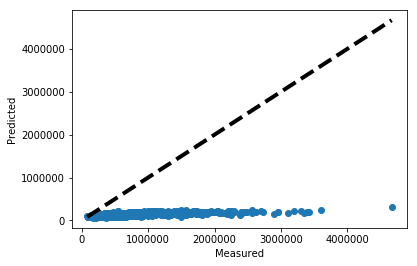

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_predict)

NameError: name 'y_test_predict' is not defined

# Conclusion 
Reducing the number of features using PCA has led to low test and train scores but has improved the generalization by bringing the test and train scores closer. The KNN Regressor, Linear Regressor, SGD Regressor and polynomial regressions worked well to explain the data but the Support vector machines failed to. 
Due to high R2 score and accuracy and low MSE, 
### The best performing model is K Neighbors Regressor with the best parameter k= 7
- 	Train score : 0.7099
- 	Test score : 0.6242
- 	Mean Absoulte Error is : 135118.6940
- 	Mean Squared Error is : 42442055640.4995
- 	R-sqaure score is : 0.6242


# PROJECT BY - Group 7
## Akhilandeshwari Bekkary (axb176530)
## Anantha Shashidhar Karunakaram(axk176830)